# Assignment 4

Kevin Martin <br>
Syracuse University <br>
CIS663 Wednesday @ 9:00pm EST

## Question 1

To find the three closest pairs, I will use the built in scipy functions for euclidean, Manhattan, and cosine simimilarity. I will first import the dataset as a pandas dataframe and remove duplicates. Then I fill find each distance measure and store the result and corresponding row number into a separate dictionary (one for each distance measure). Finally, I will sort the dictionaries and print out the three smallest distances and their row numbers.

In [101]:
# load the dataset
from pandas import read_csv
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)
print('Data before removing duplicates: ', df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print('Data after removing duplicates: ', df.shape)

Data before removing duplicates:  (150, 5)
Data after removing duplicates:  (147, 5)


In [102]:
from scipy import spatial
euc_dist = {}
man_dist = {}
cos_sim = {}
for i in range(len(df[0]) - 1):
    for k in range(i, len(df[0])):
        if i != k:
            euc = distance.euclidean(df.iloc[i][0:4], df.iloc[k][0:4])
            euc_dist[i, k] = euc
            man = distance.cityblock(df.iloc[i][0:4], df.iloc[k][0:4])
            man_dist[i, k] = man
            cos = 1 - spatial.distance.cosine(df.iloc[i][0:4], df.iloc[k][0:4])
            cos_sim[i, k] = cos
sort_euc = sorted(euc_dist.items(), key=lambda x:x[1])
sort_man = sorted(man_dist.items(), key=lambda x:x[1])
sort_cos = sorted(cos_sim.items(), key=lambda x:x[1])
print('Part A: Euclidean Distances')
print("Minimum distance and row: ", sort_euc[0])    
print("Second Minimum distance: ", sort_euc[1]) 
print("Third Minimum distance: ", sort_euc[2]) 
print('Part B: Manhattan Distances')
print("Minimum distance and row: ", sort_man[0])    
print("Second Minimum distance: ", sort_man[1]) 
print("Third Minimum distance: ", sort_man[2]) 
print('Part C: Cosine Similarties')
print("Minimum distance and row: ", sort_cos[0])    
print("Second Minimum distance: ", sort_cos[1]) 
print("Third Minimum distance: ", sort_cos[2]) 

Part A: Euclidean Distances
Minimum distance and row:  ((7, 37), 0.09999999999999964)
Second Minimum distance:  ((0, 17), 0.09999999999999998)
Third Minimum distance:  ((126, 130), 0.10000000000000009)
Part B: Manhattan Distances
Minimum distance and row:  ((7, 37), 0.09999999999999964)
Second Minimum distance:  ((0, 17), 0.09999999999999998)
Third Minimum distance:  ((126, 130), 0.10000000000000009)
Part C: Cosine Similarties
Minimum distance and row:  ((22, 116), 0.806240054640687)
Second Minimum distance:  ((14, 116), 0.8181690238849408)
Third Minimum distance:  ((33, 116), 0.8228710371910136)


## Question 2

Probablilites and classifications shown below:

In [103]:
table = {'Fruit': ['Strawberry', 'Apple', 'Pear', 'Total'],
        'Red': [300, 400, 100, 800],
        'Leaves': [250, 100, 50, 400],
         'Seeds': [200, 300, 200, 700],
         'Examples': [350, 600, 250, 1200]
        }
df2 = pd.DataFrame(table, columns=['Fruit', 'Red', 'Leaves', 'Seeds', 'Examples'])
print(df2)

        Fruit  Red  Leaves  Seeds  Examples
0  Strawberry  300     250    200       350
1       Apple  400     100    300       600
2        Pear  100      50    200       250
3       Total  800     400    700      1200


Input 1: Not Red, No Leaves, Has Seeds

p(not red) = 400/1200 = .33 <br>
p(no leaves) = 800/1200 = .66<br>
p(seeds) = 700/1200 = .58<br>
p(total) = .13<br>
<br>
P(straw|not red) = 300/350 = .86<br>
p(straw|no leaves) = 100/350 = .29<br>
p(straw|seeds) = 200/350 = .57<br>
p(straw) = 350/1200 = .29<br>
p(total) = .14 x .29 x .57 x .29 = .01<br>
p(straw) = .01 / .13 = .05<br>
<br>
P(apple|not red) = 200/600 = .33<br>
p(apple|no leaves) = 500/600 = .83<br>
p(apple|seeds) = 300/600 = .50<br>
p(apple) = 600/1200 = .50<br>
p(total) = .33 x .83 x .50 x .50 = .07<br>
p(apple) = .07 / .13 = .54<br>
<br>
P(pear|not red) = 150/250 = .60<br>
p(pear|no leaves) = 200/250 = .80<br>
p(pear|seeds) = 200/250 = .80<br>
p(pear) = 250/1200 = .21<br>
p(total) = .60 x .80 x .80 x .21 = .08<br>
p(pear) = .08 / .13 = .62<br>
<br>
The highest probability is for a pear at .62

Input 2: Red, No Leaves, No Seeds

p(red) = 800/1200 = .66 <br>
p(no leaves) = 800/1200 = .66<br>
p(no seeds) = 500/1200 = .42<br>
p(total) = .19<br>
<br>
P(straw|red) = 300/350 = .86<br>
p(straw|no leaves) = 100/350 = .29<br>
p(straw|no seeds) = 150/350 = .43<br>
p(straw) = 350/1200 = .29<br>
p(total) = .86 x .29 x .43 x .29 = .03<br>
p(straw) = .03 / .19 = .16<br>
<br>
P(apple|red) = 400/600 = .66<br>
p(apple|no leaves) = 500/600 = .83<br>
p(apple|no seeds) = 300/600 = .50<br>
p(apple) = 600/1200 = .50<br>
p(total) = .66 x .83 x .50 x .50 = .14<br>
p(apple) = .14 / .19 = .75<br>
<br>
P(pear|red) = 100/250 = .4<br>
p(pear|no leaves) = 200/250 = .80<br>
p(pear|no seeds) = 150/250 = .60<br>
p(pear) = 250/1200 = .21<br>
p(total) = .40 x .80 x .60 x .21 = .04<br>
p(pear) = .04 / .19 = .22<br>
<br>
The highest probability is for an apple at .75

Input 3: Red, Has Leaves, Has Seeds

p(red) = 800/1200 = .66 <br>
p(leaves) = 400/1200 = .33<br>
p(seeds) = 700/1200 = .58<br>
p(total) = .13<br>
<br>
P(straw|red) = 300/350 = .86<br>
p(straw|leaves) = 250/350 = .71<br>
p(straw|seeds) = 200/350 = .57<br>
p(straw) = 350/1200 = .29<br>
p(total) = .86 x .71 x .57 x .29 = .10<br>
p(straw) = .10 / .13 = .787<br>
<br>
P(apple|red) = 400/600 = .66<br>
p(apple|leaves) = 100/600 = .17<br>
p(apple|seeds) = 300/600 = .50<br>
p(apple) = 600/1200 = .50<br>
p(total) = .66 x .17 x .50 x .50 = .03<br>
p(apple) = .10 / .13 = .21<br>
<br>
P(pear|red) = 100/250 = .4<br>
p(pear|leaves) = 50/250 = .20<br>
p(pear|seeds) = 200/250 = .80<br>
p(pear) = 250/1200 = .21<br>
p(total) = .40 x .20 x .80 x .21 = .01<br>
p(pear) = .01 / .13 = .10<br>
<br>
The highest probability is for a strawberry at .787

## Question 3

### a

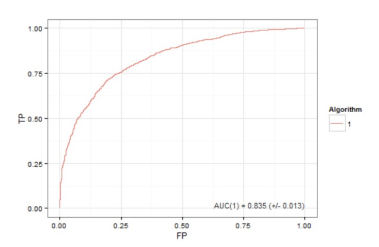

For this ROC curve, we can say that the algorithm it represents does a good job of fitting hte data. With an AUC of .835, it is striking a good balance between the tradeoff of false positives to false negatives. A point on the ROC curve shows the ratio of true positives to false positives for a given threshold.

### b

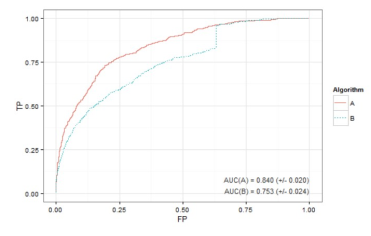

Of the two curves, Model A is better as it has a larger AUC. We can see this first visually as it is clearly more towards the upper left of the graph (higher and to the left being the optimal characteristics), as well as the calculated AUCs given in the graph as well. Algorithm A has a higher AUC value than Algorithm B, confirming what we observed initially.

### c

A random ROC curve for a a random guess would be a perfectly straight line at exactly a 45 degree angle from the origin of the graph, which can be shown by the function y=x as in the below:

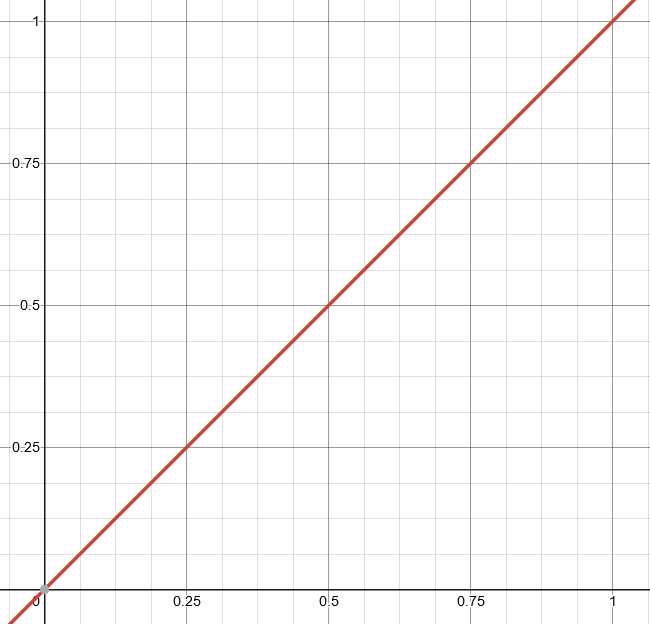

The graph looks like this because the true positive and false positive values overlap perfectly. Thus the algorithm is unable to distinguish an input as a positive or negative value. 

## Question 4

P(user) = .5 <br>
P(false user) = .5 <br>
Cost(FAR) = 10 //allowing someone who is not registered to park, you lose 10 dollars <br>
Cost(FRR) = 100 //rejecting someone who is registered and they find a different garage, you lose the potential 100 dollars revenue
<br>
DCF = 10 x 0.5 x FAR + 100 x .05 x FRR <br>
DCF = 5 x FAR + 50 x FRR <br>
<br>
Of the available agorithms, I would select Ts2-norm as it dispays the best tradeoff between FRR and FAR. As we want to minimize our DCF, the lower values for this algorithm are favorable (i.e., to let in more imopsters and only lose out on 10 each time). To set a threshold, I would focus on minimizing FRR as it impacts the overall DCF 10x as much as FAR. THe optimal threshold would be around (0.1, 0.2), indicated below by the yellow highlight on the green line (Ts2-norm):

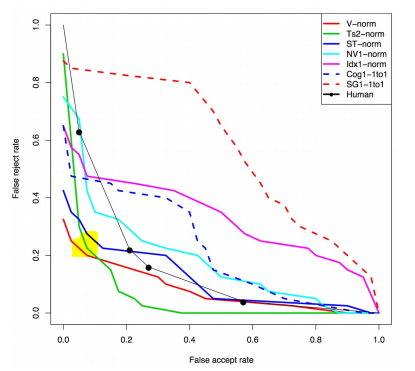

## Question 5

Distances shown below

In [104]:
points = {'L1': 8.6, 'P': 8.9, 'P1': 9.1, 'Q': 9.3, 'R': 9.5, 'S': 9.6, 'S1': 9.9, 'T': 10.4, 'T1': 10.6}
print('Features')
print('RQ: ', abs(points['R'] - points['Q']))
print("RP': ", abs(points['R'] - points['P1']))
print('RP: ', abs(points['R'] - points['P']))
print("RL': ", abs(points['R'] - points['L1']))
print('RS: ', abs(points['R'] - points['S']))
print("RS': ", abs(points['R'] - points['S1']))
print('RT: ', abs(points['R'] - points['T']))
print("RT': ", abs(points['R'] - points['T1']))

Features
RQ:  0.1999999999999993
RP':  0.40000000000000036
RP:  0.5999999999999996
RL':  0.9000000000000004
RS:  0.09999999999999964
RS':  0.40000000000000036
RT:  0.9000000000000004
RT':  1.0999999999999996
